# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather"
units = "imperial"

# Create structures to hold weather check data
lat = []
lng = []
maxTemp = []
humidity = []
clouds = []
windSpeed = []
country = []
date = []
foundCitiesList = []

params = {
    'appid': weather_api_key,
    'units': units
}

# Loop through the list of generated cities and get weather data
for index, row in enumerate(cities):    
    params['q'] = row
    
    # Print a log of each city
    print(f"Processing Record {index}: {row}")
    
    # Error check in case we can't find a city
    try:
        # Make an api request and convert to JSON
        results = requests.get(base_url, params=params).json()
        
        # If found, add the city's information to data structures
        lat.append(results['coord']['lat'])
        lng.append(results['coord']['lon'])
        maxTemp.append(results['main']['temp_max'])
        humidity.append(results['main']['humidity'])
        clouds.append(results['clouds']['all'])
        windSpeed.append(results['wind']['speed'])
        country.append(results['sys']['country'])
        date.append(results['dt'])
        foundCitiesList.append(row)
    
    # If anything in the try fails, print a message that you could not find the city
    except:
        print(f"City not found. Skipping...")
        
        
    
    

Processing Record 0: ginir
Processing Record 1: biak
Processing Record 2: wewak
Processing Record 3: puerto madero
Processing Record 4: ust-koksa
Processing Record 5: mar del plata
Processing Record 6: provideniya
Processing Record 7: codrington
Processing Record 8: illoqqortoormiut
City not found. Skipping...
Processing Record 9: butaritari
Processing Record 10: staroleushkovskaya
Processing Record 11: coquimbo
Processing Record 12: kaitangata
Processing Record 13: castro
Processing Record 14: jamestown
Processing Record 15: lompoc
Processing Record 16: broome
Processing Record 17: mys shmidta
City not found. Skipping...
Processing Record 18: rikitea
Processing Record 19: barrow
Processing Record 20: caravelas
Processing Record 21: abrau-dyurso
Processing Record 22: bethel
Processing Record 23: port alfred
Processing Record 24: souillac
Processing Record 25: tuktoyaktuk
Processing Record 26: porteirinha
Processing Record 27: hithadhoo
Processing Record 28: tautira
Processing Record 29

Processing Record 237: sioux lookout
Processing Record 238: dalvik
Processing Record 239: sovetskiy
Processing Record 240: rocha
Processing Record 241: omboue
Processing Record 242: olafsvik
Processing Record 243: saint-pierre
Processing Record 244: ranfurly
Processing Record 245: aparecida
Processing Record 246: manica
Processing Record 247: portland
Processing Record 248: charlestown
Processing Record 249: ahumada
City not found. Skipping...
Processing Record 250: am timan
Processing Record 251: vikhorevka
Processing Record 252: belmonte
Processing Record 253: zhaotong
Processing Record 254: sobolevo
Processing Record 255: sentyabrskiy
City not found. Skipping...
Processing Record 256: georgetown
Processing Record 257: svetlaya
Processing Record 258: samusu
City not found. Skipping...
Processing Record 259: pemba
Processing Record 260: tabiauea
City not found. Skipping...
Processing Record 261: havre-saint-pierre
Processing Record 262: torbay
Processing Record 263: hofn
Processing Re

Processing Record 469: knyaze-volkonskoye
Processing Record 470: vanavara
Processing Record 471: rovaniemi
Processing Record 472: cimitarra
Processing Record 473: kalabo
Processing Record 474: basco
Processing Record 475: mugumu
Processing Record 476: sangar
Processing Record 477: comodoro rivadavia
Processing Record 478: kavieng
Processing Record 479: strezhevoy
Processing Record 480: cheuskiny
City not found. Skipping...
Processing Record 481: zatoka
Processing Record 482: bobrovka
Processing Record 483: esil
Processing Record 484: cockburn town
Processing Record 485: williamsport
Processing Record 486: kahului
Processing Record 487: axim
Processing Record 488: kodinar
Processing Record 489: kefamenanu
Processing Record 490: old shinyanga
Processing Record 491: bac lieu
Processing Record 492: santa cruz
Processing Record 493: flinders
Processing Record 494: upington
Processing Record 495: miragoane
Processing Record 496: yar-sale
Processing Record 497: port moresby
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Create DataFrame
cityWeather_df = pd.DataFrame({
    "City": foundCitiesList,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxTemp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": windSpeed,
    "Country": country,
    "Date": date
})

# Export to CSV
cityWeather_df.to_csv('Output/weatherData.csv', encoding='utf-8', index=False, header=True)

# Display DataFrame
cityWeather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ginir,7.13,40.70,53.64,61,0,4.09,ET,1604364167
1,biak,-0.91,122.88,82.60,56,100,2.21,ID,1604363827
2,wewak,-3.55,143.63,86.74,64,95,1.45,PG,1604364167
3,puerto madero,14.72,-92.42,82.40,88,75,2.24,MX,1604364167
4,ust-koksa,50.27,85.61,28.49,86,100,1.59,RU,1604364168


In [12]:
# Show a summary/description of the data
cityWeather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,5.370000e+02
mean,19.542775,18.822309,57.532570,70.934823,50.448790,8.499870,1.604364e+09
std,33.329457,90.748296,22.903894,21.255672,42.619736,6.727738,1.839767e+02
min,-54.800000,-175.200000,-13.310000,1.000000,0.000000,0.220000,1.604363e+09
25%,-8.760000,-63.140000,42.930000,60.000000,1.000000,3.850000,1.604364e+09
50%,22.080000,21.550000,62.600000,77.000000,53.000000,6.930000,1.604364e+09
75%,48.460000,102.260000,77.000000,87.000000,97.000000,11.410000,1.604364e+09
max,78.220000,179.320000,96.800000,100.000000,100.000000,53.020000,1.604364e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
# Find cities with humidity > 100%
humidityOutliers = cityWeather_df.loc[(cityWeather_df['Humidity'] > 100), :]
humidityOutliers.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [16]:
#  Get the indices of cities that have humidity over 100%.
print('There are no cities with humidity over 100%.')

There are no cities with humidity over 100%.


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Skipping this step as no cities had a humidity over 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

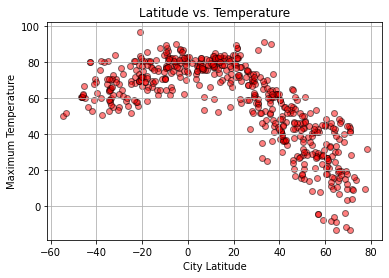

In [24]:
# Set axis values
x_values = cityWeather_df['Lat']
y_values = cityWeather_df['Max Temp']

# Plot the data
plt.scatter(x_values, y_values, color='red', edgecolors='black', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('Latitude vs. Temperature (11/02/2020)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

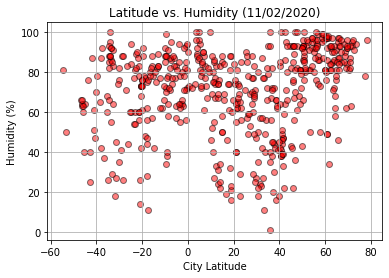

In [26]:
# Set axis values
x_values = cityWeather_df['Lat']
y_values = cityWeather_df['Humidity']

# Plot the data
plt.scatter(x_values, y_values, color='red', edgecolors='black', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (11/02/2020)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

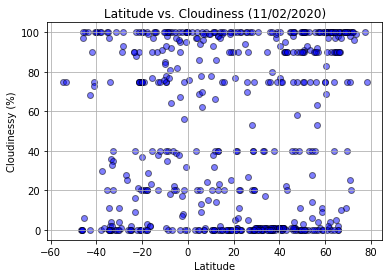

In [27]:
# Set axis values
x_values = cityWeather_df['Lat']
y_values = cityWeather_df['Cloudiness']

# Plot the data
plt.scatter(x_values, y_values, color='blue', edgecolors='black', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudinessy (%)')
plt.title('Latitude vs. Cloudiness (11/02/2020)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

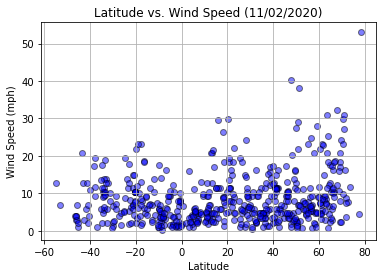

In [29]:
# Set axis values
x_values = cityWeather_df['Lat']
y_values = cityWeather_df['Wind Speed']

# Plot the data
plt.scatter(x_values, y_values, color='blue', edgecolors='black', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (11/02/2020)')
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

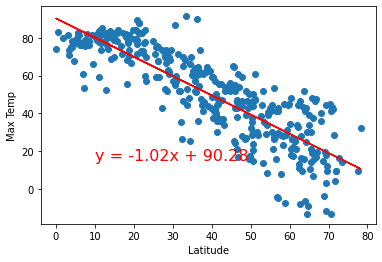

The r-value is: -0.8468390617024966


In [37]:
# Create DataFrame with data from northern hemisphere
northHem_df = cityWeather_df.loc[cityWeather_df['Lat'] > 0]

# Set the x and y values
x_values = northHem_df['Lat']
y_values = northHem_df['Max Temp']

# Linear Regression on temp vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(10,15), fontsize=16, color='red')
plt.show()

# Print the r-value
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

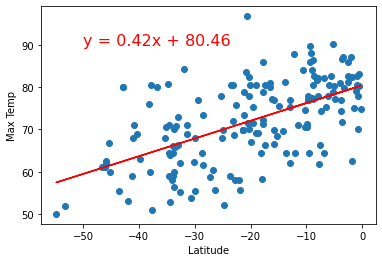

The r-value is: 0.5880436366791145


In [40]:
# Create DataFrame with data from northern hemisphere
southHem_df = cityWeather_df.loc[cityWeather_df['Lat'] < 0]

# Set the x and y values
x_values = southHem_df['Lat']
y_values = southHem_df['Max Temp']

# Linear Regression on temp vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-50,90), fontsize=16, color='red')
plt.show()

# Print the r-value
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

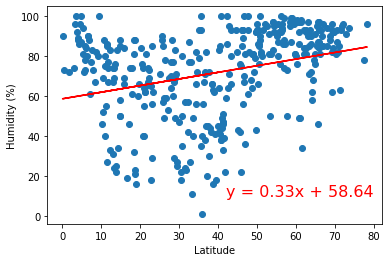

The r-value is: 0.30055802133031


In [45]:
# Create DataFrame with data from northern hemisphere
northHem_df = cityWeather_df.loc[cityWeather_df['Lat'] > 0]

# Set the x and y values
x_values = northHem_df['Lat']
y_values = northHem_df['Humidity']

# Linear Regression on temp vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(42,10), fontsize=16, color='red')
plt.show()

# Print the r-value
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

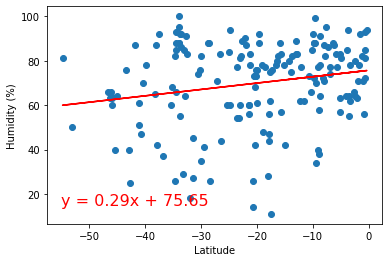

The r-value is: 0.20346360760094503


In [48]:
# Create DataFrame with data from northern hemisphere
southHem_df = cityWeather_df.loc[cityWeather_df['Lat'] < 0]

# Set the x and y values
x_values = southHem_df['Lat']
y_values = southHem_df['Humidity']

# Linear Regression on temp vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-55,15), fontsize=16, color='red')
plt.show()

# Print the r-value
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

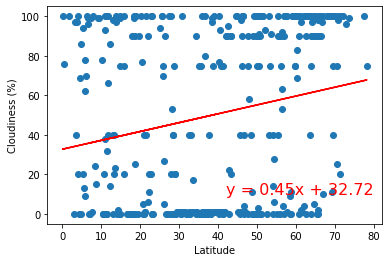

The r-value is: 0.20703402236737978


In [49]:
# Create DataFrame with data from northern hemisphere
northHem_df = cityWeather_df.loc[cityWeather_df['Lat'] > 0]

# Set the x and y values
x_values = northHem_df['Lat']
y_values = northHem_df['Cloudiness']

# Linear Regression on temp vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(42,10), fontsize=16, color='red')
plt.show()

# Print the r-value
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

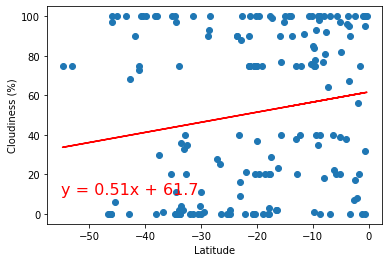

The r-value is: 0.17048500052079346


In [52]:
# Create DataFrame with data from northern hemisphere
southHem_df = cityWeather_df.loc[cityWeather_df['Lat'] < 0]

# Set the x and y values
x_values = southHem_df['Lat']
y_values = southHem_df['Cloudiness']

# Linear Regression on temp vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-55,10), fontsize=16, color='red')
plt.show()

# Print the r-value
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

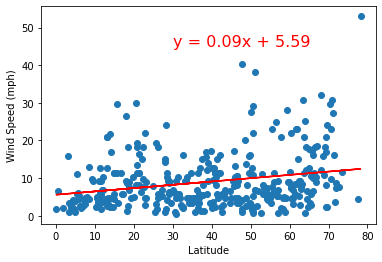

The r-value is: 0.24176067959449823


In [54]:
# Create DataFrame with data from northern hemisphere
northHem_df = cityWeather_df.loc[cityWeather_df['Lat'] > 0]

# Set the x and y values
x_values = northHem_df['Lat']
y_values = northHem_df['Wind Speed']

# Linear Regression on temp vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(30,45), fontsize=16, color='red')
plt.show()

# Print the r-value
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

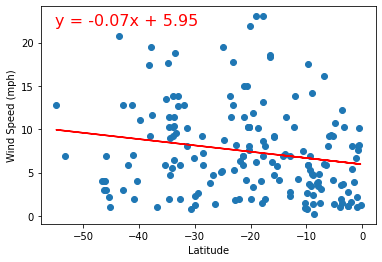

The r-value is: -0.19117078635012064


In [58]:
# Create DataFrame with data from northern hemisphere
southHem_df = cityWeather_df.loc[cityWeather_df['Lat'] < 0]

# Set the x and y values
x_values = southHem_df['Lat']
y_values = southHem_df['Wind Speed']

# Linear Regression on temp vs. lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-55,22), fontsize=16, color='red')
plt.show()

# Print the r-value
print(f"The r-value is: {rvalue}")